# Basic analysis of *"GIS data"*

Place data in `file_parser/data` directory.

What is needed for a model:
* Junctions
    * **Elevation** - The elevation in feet (meters) above some common reference of the junction. This is a **required** property. Elevation is used only to compute pressure at the junction. It does not affect any other computed quantity.
    // * **Base Demand** -The average or nominal demand for water by the main category of consumer at the junction, as measured in the current flow units. A negative value is used to indicate an external source of flow into the junction. If left blank then demand is assumed to be zero.
* Pipes
    *  **Length** - The actual length of the pipe in feet (meters). This is a **required** property.
    * **Diam** - The pipe diameter in inches (mm). This is a **required** property.
    * **Roughness** - The roughness coefficient of the pipe. It is unitless for Hazen-Williams or Chezy-Manning roughness and has units of millifeet (mm) for Darcy-Weisbach roughness. This is a **required** property.


In [1]:
import pandas as pd
import geopandas as gpd

# attributestablebrowsercontroller (1)

In [7]:
controller = pd.read_excel(
    "./data/attributestablebrowsercontroller_1.xlsx", index_col=0
)

C:\Users\jolka\OneDrive\Pulpit\studia\sem_8\MISS\System-modelling-and-simulation\venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
controller.head()

In [9]:
controller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 68085 to 95556
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Stan eksploatacji        1033 non-null   object        
 1   Funkcja                  1030 non-null   object        
 2   Średnica nominalna [mm]  771 non-null    float64       
 3   Materiał                 41 non-null     object        
 4   Rok budowy               0 non-null      float64       
 5   Rzędna początku          0 non-null      float64       
 6   Rzędna końca             0 non-null      float64       
 7   Miasto                   602 non-null    object        
 8   Ulica                    602 non-null    object        
 9   Numer domu               204 non-null    object        
 10  Przebieg orientacyjny    0 non-null      float64       
 11  Długość pomierzona [m]   0 non-null      float64       
 12  Własność                 1033 non-

Drop not important columns

In [20]:
columns_to_drop = [
    "Rok budowy",
    "Rzędna początku",
    "Rzędna końca",
    "Miasto",
    "Ulica",
    "Przebieg orientacyjny",
    "Długość pomierzona [m]",
    "Własność",
    "Źródło danych",
    "Inspektor",
    "Kierownik budowy",
    "Inwestor",
    "Wykonawca",
    "Numer uzg. proj.",
    "Data uzg. proj.",
    "Miasto (rozwinięte)",
    "Numer domu (rozwinięte)",
    "Gmina",
    "Nr środka trwałego",
    "Użytkownik modyfikujący",
    "Użytkownik tworzący",
    "Data utworzenia",
    "numer",
    "automat",
]

controller = controller.drop(columns=columns_to_drop)

In [22]:
controller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 68085 to 95556
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Stan eksploatacji        1014 non-null   object        
 1   Funkcja                  1014 non-null   object        
 2   Średnica nominalna [mm]  763 non-null    float64       
 3   Materiał                 41 non-null     object        
 4   Numer domu               203 non-null    object        
 5   Uwagi                    41 non-null     object        
 6   Długość geometrii        1014 non-null   float64       
 7   Ulica (rozwinięte)       596 non-null    object        
 8   Opis lokalizacji         1014 non-null   object        
 9   Nr działki               999 non-null    object        
 10  Data modyfikacji         692 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 95.1+ KB


In [ ]:
controller.head()

In [11]:
controller["Stan eksploatacji"].value_counts()

Stan eksploatacji
Czynny          1014
Nieczynny         10
Projektowany       9
Name: count, dtype: int64

In [12]:
controller = controller[controller["Stan eksploatacji"] == "Czynny"]

In [13]:
controller["Stan eksploatacji"].value_counts()

Stan eksploatacji
Czynny    1014
Name: count, dtype: int64

In [24]:
controller["Funkcja"].value_counts()

Funkcja
Przyłącze               494
Rozdzielczy             281
Inny                    165
Przyłącze hydrantowe     71
Magistralny               3
Name: count, dtype: int64

In [25]:
controller["Średnica nominalna [mm]"].value_counts()  # Diam

Średnica nominalna [mm]
32.0     241
40.0     207
100.0     65
90.0      64
110.0     59
80.0      35
50.0      27
63.0      19
150.0     17
25.0      13
160.0     11
20.0       4
75.0       1
Name: count, dtype: int64

In [26]:
controller["Materiał"].value_counts()

Materiał
PVC            19
Brak danych    13
PE              9
Name: count, dtype: int64

In [27]:
controller["Uwagi"].value_counts()  # duplicates

Uwagi
PCV                                                        19
PE                                                          9
zmiana średnicy na podstawie map branżowych z 90 na 110     7
zmiana średnicy na podstawie map branżowych z 110 na 90     2
brak                                                        1
data pomiaru: 28.02.1997                                    1
347/03                                                      1
209/08                                                      1
Name: count, dtype: int64

In [28]:
controller["Długość geometrii"].value_counts()  # what is this?

Długość geometrii
7.67      3
5.88      3
2.17      3
11.16     3
0.36      3
         ..
0.88      1
129.18    1
137.76    1
114.38    1
42.89     1
Name: count, Length: 943, dtype: int64

In [29]:
controller["Opis lokalizacji"].value_counts()  # ...

Opis lokalizacji
podziemny    1014
Name: count, dtype: int64

# attributestablebrowsercontroller

In [33]:
controller = pd.read_excel("./data/attributestablebrowsercontroller.xlsx")

C:\Users\jolka\OneDrive\Pulpit\studia\sem_8\MISS\System-modelling-and-simulation\venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [34]:
controller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   address_point_id      797 non-null    object        
 1   id_address_point_map  797 non-null    int64         
 2   id_msc_zamontu        797 non-null    int64         
 3   wodomierz             797 non-null    bool          
 4   id_punktu             797 non-null    int64         
 5   id_zamontu            797 non-null    int64         
 6   id_wodomierza         797 non-null    int64         
 7   adres                 797 non-null    object        
 8   Średnica              786 non-null    float64       
 9   Producent             786 non-null    object        
 10  Nr fabryczny          797 non-null    object        
 11  Główny                143 non-null    float64       
 12  srednia_dobowa        712 non-null    float64       
 13  Data zamontu        

In [ ]:
controller.head()

In [36]:
controller["wodomierz"].value_counts()

wodomierz
True    797
Name: count, dtype: int64

Dane do kalibracji.
Problem: brak adresu w przypadku popszedniej tabeli. Możliwy analogiczny problem w przypadku innych plików.

## gis_data_billing_view_1

In [41]:
gis = gpd.read_file(
    "./data/gis_data_billing_view_1/gis_data.billing_view.gml", index_col=0
)

In [42]:
gis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fid                   797 non-null    object  
 1   address_point_id      797 non-null    int64   
 2   id_address_point_map  797 non-null    int64   
 3   id_msc_zamontu        797 non-null    int64   
 4   wodomierz             797 non-null    bool    
 5   cieplomierz           797 non-null    bool    
 6   id_punktu             797 non-null    int64   
 7   id_zamontu            797 non-null    int64   
 8   id_wodomierza         797 non-null    int64   
 9   adres                 797 non-null    object  
 10  srednica              786 non-null    float64 
 11  producent             786 non-null    object  
 12  nr_fabryczny          797 non-null    object  
 13  srednia_dobowa        712 non-null    float64 
 14  data_zamontu          797 non-null    object  
 15

In [ ]:
gis.head()

<Axes: >

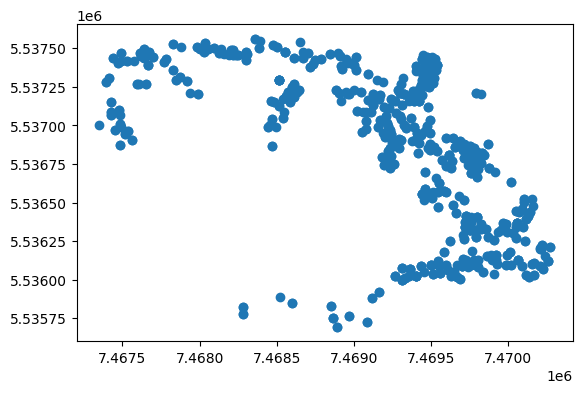

In [45]:
gis.plot()

In [46]:
gis["wodomierz"].value_counts()

wodomierz
True    797
Name: count, dtype: int64

Same data as before

## gis_data_billing_view_2

In [47]:
gis = gpd.read_file(
    "./data/gis_data_billing_view_2/gis_data.billing_view.shp", index_col=0
)

In [48]:
gis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address_po  797 non-null    int64   
 1   id_address  797 non-null    int64   
 2   id_msc_zam  797 non-null    int64   
 3   wodomierz   797 non-null    object  
 4   cieplomier  797 non-null    object  
 5   id_punktu   797 non-null    int64   
 6   id_zamontu  797 non-null    int64   
 7   id_wodomie  797 non-null    int64   
 8   adres       797 non-null    object  
 9   srednica    786 non-null    float64 
 10  producent   786 non-null    object  
 11  nr_fabrycz  797 non-null    object  
 12  symbol      0 non-null      object  
 13  glowny      797 non-null    object  
 14  srednia_do  712 non-null    float64 
 15  data_zamon  797 non-null    object  
 16  data_wymon  363 non-null    object  
 17  rodzaj_mon  0 non-null      object  
 18  miejsce_in  0 non-null      object  
 19  

<Axes: >

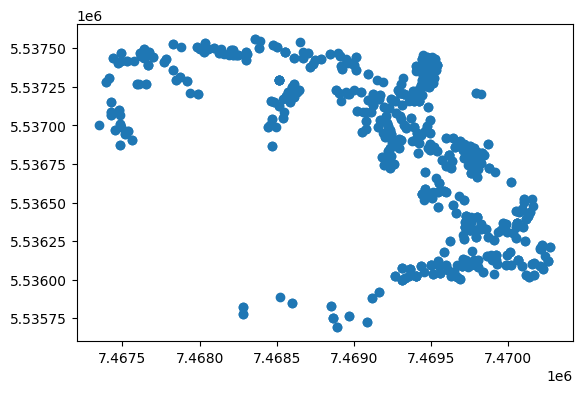

In [49]:
gis.plot()

JW

## gis_data_billing_view_3

In [51]:
gis = gpd.read_file(
    "./data/gis_data_billing_view_3/gis_data.sw_przewod.shp", index_col=0
)

In [52]:
gis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   kg_stan_ek  1033 non-null   object  
 1   kg_model    1033 non-null   object  
 2   kg_strefa   1033 non-null   object  
 3   kg_funkcja  1030 non-null   object  
 4   kg_srednic  771 non-null    float64 
 5   kg_sredni0  0 non-null      object  
 6   kg_sredni1  0 non-null      object  
 7   kg_sredni2  1033 non-null   object  
 8   kg_materia  41 non-null     object  
 9   kg_materi0  1033 non-null   object  
 10  kg_rok_bud  0 non-null      object  
 11  kg_rok_bu0  1033 non-null   object  
 12  kg_chropow  0 non-null      object  
 13  kg_wsp_str  0 non-null      object  
 14  kg_wsp_rea  0 non-null      object  
 15  kg_wsp_re0  0 non-null      object  
 16  kg_rzedna_  0 non-null      object  
 17  kg_rzedna0  0 non-null      object  
 18  kg_srednia  0 non-null      object  
 19

<Axes: >

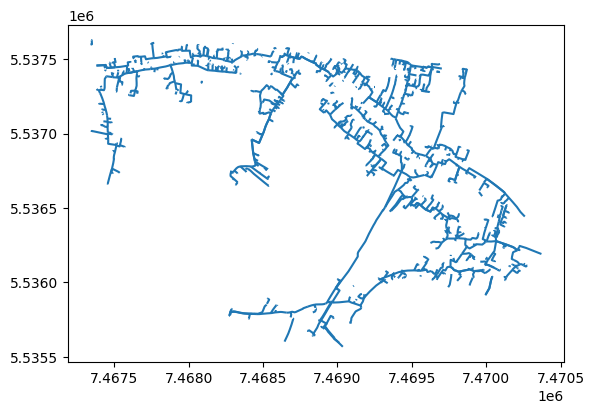

In [53]:
gis.plot()

Obiecujące

In [ ]:
gis.head(10)

In [55]:
import numpy as np


gis = gis.replace("?", np.nan)

C:\Users\jolka\AppData\Local\Temp\ipykernel_9444\4091929304.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gis = gis.replace("?", np.nan)


In [56]:
gis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   kg_stan_ek  1033 non-null   object  
 1   kg_model    0 non-null      float64 
 2   kg_strefa   0 non-null      float64 
 3   kg_funkcja  1030 non-null   object  
 4   kg_srednic  771 non-null    float64 
 5   kg_sredni0  0 non-null      object  
 6   kg_sredni1  0 non-null      object  
 7   kg_sredni2  0 non-null      float64 
 8   kg_materia  41 non-null     object  
 9   kg_materi0  0 non-null      float64 
 10  kg_rok_bud  0 non-null      object  
 11  kg_rok_bu0  0 non-null      float64 
 12  kg_chropow  0 non-null      object  
 13  kg_wsp_str  0 non-null      object  
 14  kg_wsp_rea  0 non-null      object  
 15  kg_wsp_re0  0 non-null      object  
 16  kg_rzedna_  0 non-null      object  
 17  kg_rzedna0  0 non-null      object  
 18  kg_srednia  0 non-null      object  
 19

In [63]:
gis[["the_geom_l", "geometry"]].head(10)  #

,the_geom_l,geometry
0,30.82,"LINESTRING (7469576.080 5537306.095, 7469575.9..."
1,1.74,"LINESTRING (7469390.320 5536869.095, 7469389.6..."
2,43.71,"LINESTRING (7469380.120 5536896.205, 7469382.3..."
3,22.73,"LINESTRING (7469019.350 5536008.995, 7469001.6..."
4,10.79,"LINESTRING (7469545.580 5536079.125, 7469545.7..."
5,57.60,"LINESTRING (7469615.780 5537286.365, 7469614.5..."
6,0.50,"LINESTRING (7469572.070 5537286.905, 7469571.9..."
7,233.86,"LINESTRING (7469561.340 5537291.005, 7469561.6..."
8,103.21,"LINESTRING (7469607.550 5537442.545, 7469609.2..."
9,61.41,"LINESTRING (7469560.440 5537292.295, 7469560.6..."


In [62]:
np.sqrt((7469572.070 - 7469571.900) ** 2 + (5537286.905 - 5537286.435) ** 2)

0.49979996058922127

In [65]:
gis["length"] = gis.geometry.apply(lambda x: x.length)  # Length

In [72]:
gis[
    (gis["length"] > (gis["the_geom_l"] - 0.01))
    & (gis["length"] < (gis["the_geom_l"] + 0.01))
].shape == gis.shape

True

Can use `the_geom_l` as `Length` or use `geometry` for "better" results.

In [76]:
gis["kg_srednic"].value_counts()

kg_srednic
32.0     241
40.0     210
90.0      65
100.0     65
110.0     59
80.0      35
50.0      27
63.0      21
150.0     17
25.0      15
160.0     11
20.0       4
75.0       1
Name: count, dtype: int64

In [74]:
gis["kg_srednic"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1033 entries, 0 to 1032
Series name: kg_srednic
Non-Null Count  Dtype  
--------------  -----  
771 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [79]:
gis["kg_stan_ek"].value_counts()

kg_stan_ek
Czynny          1014
Nieczynny         10
Projektowany       9
Name: count, dtype: int64

In [81]:
gis["kg_funkcja"].value_counts()

kg_funkcja
PrzyÅÄ
cze               502
Rozdzielczy               285
Inny                      168
PrzyÅÄ
cze hydrantowe     72
Magistralny                 3
Name: count, dtype: int64